In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
env = GridworldEnv('1') # Number of task 

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Q-Learning with rollout

In [3]:
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [9]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.95 # reward discount
TAU=0.5
LEARNING_COUNT = 5
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
record=True
from algorithms.Q_Learning_rollout import Q_Learning_Rollout_Agents

env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Rollout_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,10,record)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    epsilon = agents.update_epsilon(j)
    total_reward,reward_1,reward_2=agents.learn(epsilon)
    print("GAME "+str(j)+"\n")
    if j%1==0 and record:
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        print(len(env.grid_images))
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/{h}.gif".format(h=j), writer="pillow")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

150
-39.0
-20.0
GAME 1

354


[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.02        0.          0.          0.          0.
  -0.12323201 -0.12323201  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.02        0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]


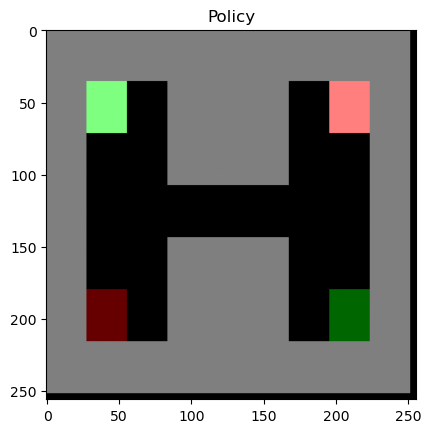

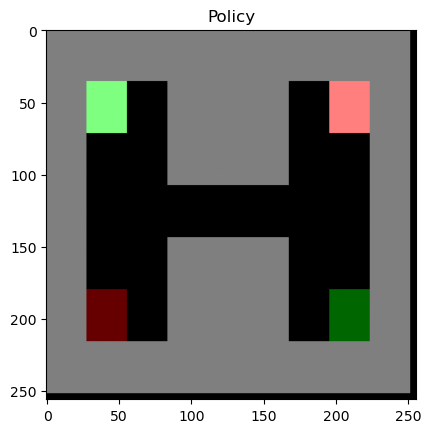

In [4]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[3,5,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

policy_function2 = np.argmax( Q_a2_mean , axis = 2)
print(Q_a2_mean[:,:,2])

def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# SOFT Q-LEARNING BASELINE

In [3]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.95 # reward discount
TAU=0.5
LEARNING_COUNT = 100
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
IS_MONITOR = True
from algorithms.Soft_Q_Learning_Baseline import Soft_Q_Learning_Baseline_Agents


env = GridworldEnv('1')
env.reset()
agents = Soft_Q_Learning_Baseline_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for i in range(LEARNING_COUNT):
    total_reward,reward_1,reward_2=agents.learn()
    print("GAME "+str(i)+"\n")
    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

###### LEARNING #####
GAME 0

-40.0
-44.0
GAME 1

-40.0
-101.0
GAME 2

-86.0
-119.0
GAME 3

-37.0
-162.0
GAME 4

-94.0
-105.0
GAME 5

-153.0
-95.0
GAME 6

-60.0
-30.0
GAME 7

-66.0
-38.0
GAME 8

-175.0
-174.0
GAME 9

-45.0
-37.0
GAME 10

-138.0
-148.0
GAME 11

-35.0
-45.0
GAME 12

-21.0
-38.0
GAME 13

-26.0
-14.0
GAME 14

-44.0
-10.0
GAME 15

-6.0
-15.0
GAME 16

-43.0
-55.0
GAME 17

-71.0
-74.0
GAME 18

-5.0
-20.0
GAME 19

-70.0
-24.0
GAME 20

-178.0
-161.0
GAME 21

-34.0
-8.0
GAME 22

-59.0
-67.0
GAME 23

-37.0
-37.0
GAME 24

-33.0
-24.0
GAME 25

3.0
6.0
GAME 26

-27.0
-64.0
GAME 27

-1.0
-24.0
GAME 28

-17.0
-29.0
GAME 29

-26.0
-25.0
GAME 30

3.0
-6.0
GAME 31

-61.0
-66.0
GAME 32

-60.0
-66.0
GAME 33

-12.0
-10.0
GAME 34

-56.0
-54.0
GAME 35

-6.0
5.0
GAME 36

-36.0
-39.0
GAME 37

-28.0
-21.0
GAME 38

-17.0
-19.0
GAME 39

-42.0
-25.0
GAME 40

4.0
-6.0
GAME 41

-118.0
-112.0
GAME 42

-31.0
-42.0
GAME 43

-48.0
-75.0
GAME 44

-9.0
-14.0
GAME 45

-76.0
-55.0
GAME 46

-18.0
-9.0
GAME 47

In [4]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,1,7,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[1,1,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

policy_function2 = np.argmax( Q_a2_mean , axis = 2)
print(Q_a2_mean[:,:,2])

def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

NameError: name 'agents' is not defined